In [5]:
col = 'crim	zn	indus	chas	nox	rm	age	dis	rad	tax	ptratio	b	lstat	medv'.split()
len(col)

14

#### Price 예측 - 다항회귀
- 데이터셋 : hosing.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 다항회귀, knn
- 피쳐 : 나머지 모두
- 타겟: medv



In [40]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

In [7]:
houseDict = {x:[] for x in col}

In [8]:
houseDF = pd.DataFrame(pd.read_csv('../data/housing.csv', header=None))
for i in houseDF.index:
    for j in range(14):
        houseDict[col[j]].append(houseDF.iloc[i,:][0].split()[j])
    
# houseDF.iloc[1,:]

In [9]:
houDF = pd.DataFrame(houseDict)
houDF = houDF.astype(float)
houDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
### 데이터 시각화

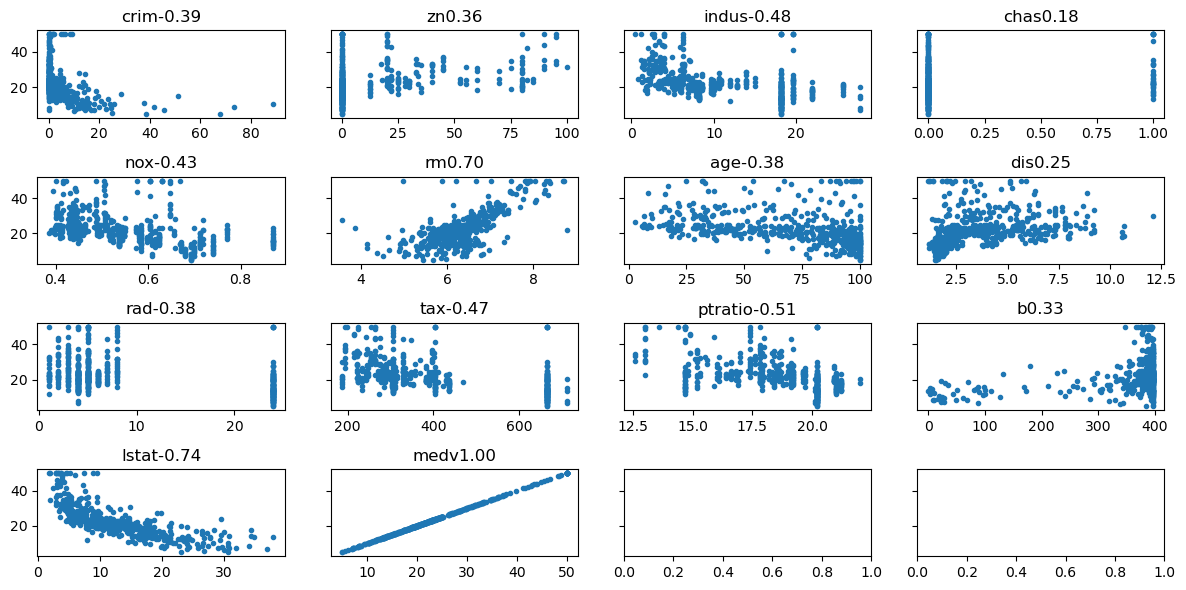

In [11]:
fig, ax = plt.subplots(4,4, sharey=True,figsize = (12,6))
ax = ax.flatten()
# print(ax[0])
for i in range(0,14):
    ax[i].plot(houDF.iloc[:,i],houDF['medv'], '.')
    ax[i].set_title(houDF.columns[i]+ str(f"{houDF.iloc[:,i].corr(houDF['medv']):.2f}"))

plt.tight_layout()
plt.show()    


medv 연관성 있는 데이터.
- rm, istat

In [12]:
feature = houDF[['rm','lstat']]
target = houDF['medv']

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [13]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [14]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (379, 2) / X_test => 2D, (127, 2)
y_train => 1D (379,) / y_test => 2D, (127,)


[4] 학습 진행

In [15]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [ 5.78954804 -0.96131716]
lr.intercept_ -2.3846000046845397
X_train = 5.789548037239641*y_train + -2.3846000046845397


[5] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [41]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['r2score'].append(r2score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.6516621177358315, 0.6752356557155712],
 'r2score': [0.6516621177358315, 0.6752356557155712],
 'rmse': [5.440183877216854, 5.176329251782572],
 'mse': [29.595600617930202, 26.794384522859918],
 'mae': [4.022674942591291, 3.655817482041058]}

In [43]:
resultDF = pd.DataFrame(r_dict, index=['train', 'test'])
resultDF

,score,r2score,rmse,mse,mae
train,0.651662,0.651662,5.440184,29.595601,4.022675
test,0.675236,0.675236,5.176329,26.794385,3.655817


In [45]:
# 3번쨰 차이 열 추가
resultDF.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF.round(4)

,score,r2score,rmse,mse,mae
train,0.6517,0.6517,5.4402,29.5956,4.0227
test,0.6752,0.6752,5.1763,26.7944,3.6558
diff,0.0236,0.0236,0.2639,2.8012,0.3669


In [52]:
X_train

,rm,lstat
218,5.951,17.920000
117,5.872,15.370000
195,7.875,6.256972
162,7.802,6.229918
219,6.373,10.500000
...,...,...
486,6.114,14.980000
189,7.185,6.247048
495,5.670,17.600000
206,6.326,10.970000


In [88]:
y1 = X_train['rm']*lr.coef_[0]+lr.intercept_-10
y2 = X_train['lstat']*lr.coef_[1]+lr.intercept_+35

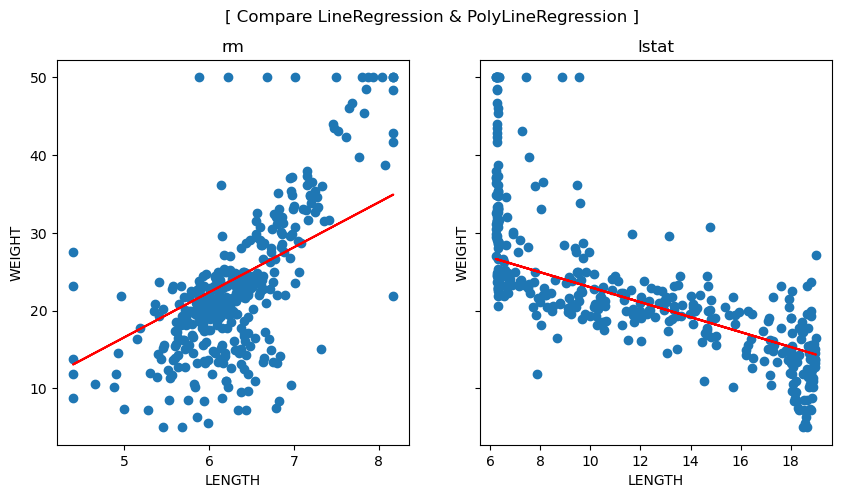

In [89]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey=True)

axes = axes.flatten()                               
# data_label = [[X_train, lr.predict(X_train)]]

for ax, title, col, ys in zip(axes, X_train.columns, X_train.columns, [y1, y2]):
    ax.plot(X_train[col], y_train, 'o', label='Fish')
    ax.plot(X_train[col],ys, 'r-', label='Poly Line')
    ax.set_xlabel("LENGTH")
    ax.set_ylabel("WEIGHT")
    ax.set_title(title)

plt.suptitle("[ Compare LineRegression & PolyLineRegression ]")
plt.show()

결과분석
- 트레인보다 테스트에서 더 좋은 결과를 보이긴 하나
- 점수가 낮음
- 2개를 써서 정확히 알수없음.
- => 과 소 적 합
해결방안
- 1개만 써서 다시해볼것

In [90]:
feature = houDF[['lstat']]
target = houDF['medv']

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [91]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [92]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (379, 1) / X_test => 2D, (127, 1)
y_train => 1D (379,) / y_test => 2D, (127,)


[4] 학습 진행

In [93]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [94]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [-0.96170137]
lr.intercept_ 34.73151000394647
X_train = -0.9617013730476837*y_train + 34.73151000394647


[5] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [95]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['r2score'].append(r2score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.554892502859145, 0.509109869521807],
 'r2score': [0.554892502859145, 0.509109869521807],
 'rmse': [6.149583178502135, 6.363995618316172],
 'mse': [37.81737326931641, 40.50044022994743],
 'mae': [4.450732830213589, 4.72649247196493]}

In [96]:
resultDF = pd.DataFrame(r_dict, index=['train', 'test'])
resultDF

,score,r2score,rmse,mse,mae
train,0.554893,0.554893,6.149583,37.817373,4.450733
test,0.509110,0.509110,6.363996,40.500440,4.726492


In [97]:
# 3번쨰 차이 열 추가
resultDF.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF.round(4)

,score,r2score,rmse,mse,mae
train,0.5549,0.5549,6.1496,37.8174,4.4507
test,0.5091,0.5091,6.3640,40.5004,4.7265
diff,0.0458,0.0458,0.2144,2.6831,0.2758


In [106]:
X_train

,lstat
218,17.92
117,15.37
195,2.97
162,1.92
219,10.50
...,...
486,14.98
189,5.39
495,17.60
206,10.97


In [108]:
y = X_train*lr.coef_+lr.intercept_


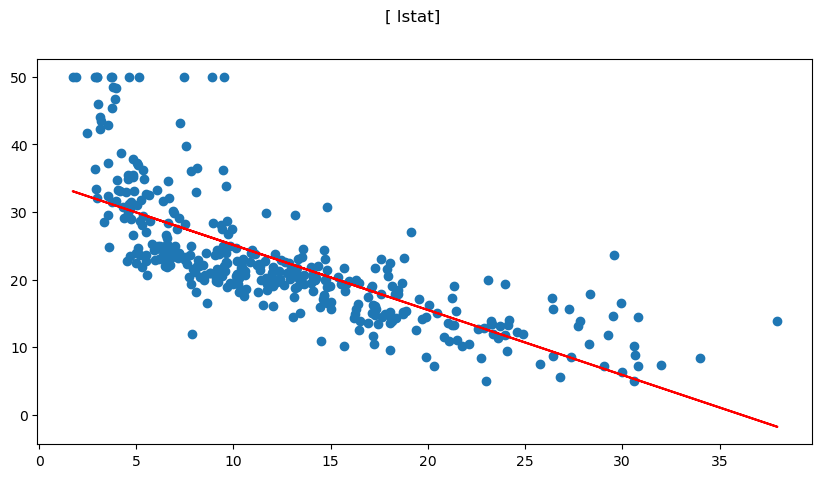

In [115]:
fig, axes = plt.subplots(1, 1, figsize = (10, 5), sharey=True)

# axes = axes.flatten()                               
# data_label = [[X_train, lr.predict(X_train)]]

# for ax, title, col, ys in zip(axes, X_train.columns, X_train.columns, [y1, y2]):
plt.plot(X_train, y_train, 'o', label='Fish')
plt.plot(X_train, y, 'r-', label='Poly Line')
# ax.set_title(title)

plt.suptitle("[ lstat]")
plt.show()

평가
- 점수가 더낮아짐.
- rm으로 다시.

In [116]:
feature = houDF[['rm']]
target = houDF['medv']

[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [117]:
## 3-1 피처와 타겟 분리
featureDF = feature
targetSR = target
print(f"featureDF => {featureDF.ndim}D, targetSr => {targetSR.ndim}D")

featureDF => 2D, targetSr => 1D


In [118]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (379, 1) / X_test => 2D, (127, 1)
y_train => 1D (379,) / y_test => 2D, (127,)


[4] 학습 진행

In [119]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [120]:
## 학습 후 모델에 적용되는 a,b: 모델 파라미터
print(f"lr.coef_ {lr.coef_}")
print(f"lr.intercept_ {lr.intercept_}")
print(f"X_train = {lr.coef_[0]}*y_train + {lr.intercept_}")

lr.coef_ [9.10304678]
lr.intercept_ -34.64142400156928
X_train = 9.10304677607185*y_train + -34.64142400156928


[5] 성능 평가 <hr>
- 모델 성능 평가
- 손실 계산

In [121]:
## 모듈화
r_dict = {x:[] for x in ['score', 'r2score','rmse', 'mse', 'mae']}
for x, y in [[X_train,  y_train], [X_test, y_test]]:
    score = lr.score(x, y)
    pre_y = lr.predict(x)
    r2score = r2_score(y, pre_y)
    rmse = root_mean_squared_error(y, pre_y)
    mse = mean_squared_error(y, pre_y)
    mae = mean_absolute_error(y,pre_y)
    r_dict['score'].append(score)
    r_dict['r2score'].append(r2score)
    r_dict['rmse'].append(rmse)
    r_dict['mse'].append(mse)
    r_dict['mae'].append(mae)

r_dict    
    

{'score': [0.465330101662064, 0.5375324405575939],
 'r2score': [0.465330101662064, 0.5375324405575939],
 'rmse': [6.739940964257061, 6.1770107706568025],
 'mse': [45.42680420167039, 38.155462060810144],
 'mae': [4.626893950033117, 3.9111320263392693]}

In [122]:
resultDF = pd.DataFrame(r_dict, index=['train', 'test'])
resultDF

,score,r2score,rmse,mse,mae
train,0.465330,0.465330,6.739941,45.426804,4.626894
test,0.537532,0.537532,6.177011,38.155462,3.911132


In [123]:
# 3번쨰 차이 열 추가
resultDF.loc['diff'] = (resultDF.loc['train']-resultDF.loc['test']).abs()
resultDF.round(4)

,score,r2score,rmse,mse,mae
train,0.4653,0.4653,6.7399,45.4268,4.6269
test,0.5375,0.5375,6.1770,38.1555,3.9111
diff,0.0722,0.0722,0.5629,7.2713,0.7158


In [124]:
X_train

,rm
218,5.951
117,5.872
195,7.875
162,7.802
219,6.373
...,...
486,6.114
189,7.185
495,5.670
206,6.326


In [125]:
y = X_train*lr.coef_+lr.intercept_


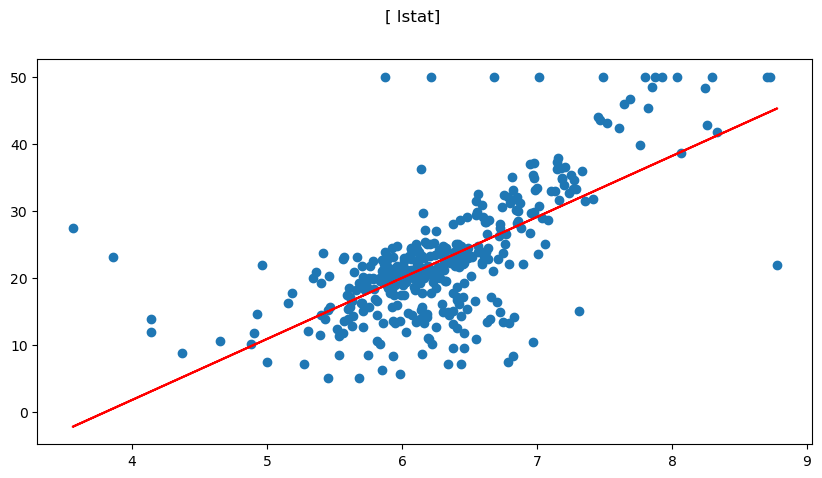

In [126]:
fig, axes = plt.subplots(1, 1, figsize = (10, 5), sharey=True)

# axes = axes.flatten()                               
# data_label = [[X_train, lr.predict(X_train)]]

# for ax, title, col, ys in zip(axes, X_train.columns, X_train.columns, [y1, y2]):
plt.plot(X_train, y_train, 'o', label='Fish')
plt.plot(X_train, y, 'r-', label='Poly Line')
# ax.set_title(title)

plt.suptitle("[ lstat]")
plt.show()

평가
- 2개 썼을 때보다 낮음
- 따라서 2개를 쓰고, 점수를 올리기위해 피처 생성함

[5] 예측 서비스 <hr>
- 웹 또는 앱에 포함된 모델에서 예측 서비스 진행
- 예측 메서드 : 알고리즘객체변수명.predict(2D_data) ==> 1D 예측갑 반환
    ** 전제조건  >>> 학습 시 진행된 데이터 전처리괒어을 거친 2D_data 를 전달해야함

In [20]:
## - 모델이 결정한 선형식기반 결과 예측
pre_medv = lr.predict(feature)

# # 모델 예측값과 정답의 차이계산
# mse = mean_squared_error(feature, pre_mpg)
# #오차평균

# mae = mean_absolute_error(feature,pre_mpg)

In [21]:
feature

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [22]:
new_data = [[6, 10]]

pre_medv = lr.predict(new_data)

print(f" 예상 medv 는 {pre_medv}입니다 ")

 예상 medv 는 [22.93428907]입니다 


c:\Users\matdo\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
